In [1]:
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("problem1/gp.csv", header=None)
data = data.sample(frac=1)

training_input = data.iloc[:60, 0].values
training_target = data.iloc[:60, 1].values
testing_input = data.iloc[60:, 0].values
testing_target = data.iloc[60:, 1].values

thetas_configs = [[1, 4, 0, 0], 
                  [0, 0, 0, 1], 
                  [1, 4, 0, 5], 
                  [1, 64, 10, 0]]

In [3]:
class Kernel:
    def __init__(self, thetas):
        self.thetas = thetas
        
    def kernel_function(self, xn, xm):
        return self.thetas[0] * np.exp(-0.5*self.thetas[1]*np.subtract.outer(xn, xm)**2) + \
                self.thetas[2] + self.thetas[3] * np.multiply.outer(xn, xm)
    
class GP_Regreesion:
    def __init__(self, thetas):
        self.kernel = Kernel(thetas)
        self.thetas = thetas
        self.beta_inv = 1
    
    def fit(self, training_input, training_target):
        self.training_input = training_input
        self.training_target = training_target
        self.C_inv = np.linalg.inv(self.kernel.kernel_function(self.training_input, self.training_input) + self.beta_inv*np.eye(len(self.training_input)))
    
    def predict(self, data):
        data_num = len(data)
        mean = np.empty(data_num)
        std = np.empty(data_num)
        
        for i in range(data_num):
            k = self.kernel.kernel_function(self.training_input, data[i])
            mean[i] = np.linalg.multi_dot([k.T, self.C_inv, self.training_target]) #k*self.C_inv*self.training_target
            c = self.kernel.kernel_function(data[i], data[i]) + self.beta_inv
            std[i] = np.sqrt(c - np.linalg.multi_dot([k.T, self.C_inv, k])) # 之後確定後改成單純用＊
            
        return mean, std
    
    def plot(self, mean, std, data, pos):
        axarr[pos].set_title('thetas: '+str(self.thetas))
        axarr[pos].plot(data, mean, 'r-')
        axarr[pos].fill_between(data, mean+std, mean-std, color='pink', alpha=0.5)
        axarr[pos].scatter(self.training_input, self.training_target, facecolors='none', edgecolors='b')
        axarr[pos].set_xlabel('x')
        axarr[pos].set_ylabel('t')
    
    def RMSE(self, y, t):
        return np.sqrt(np.mean((y-t)**2))

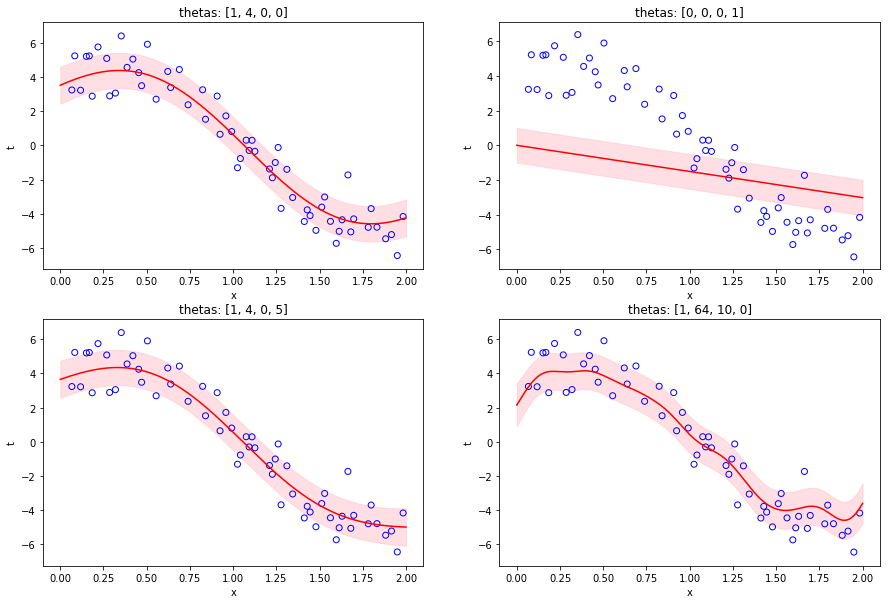

In [6]:
f, axarr = plt.subplots(2, 2, figsize=(15,10))
plot_pos = {0:(0, 0), 1:(0, 1), 2:(1, 0), 3:(1, 1)}

for i, thetas in enumerate(thetas_configs):
    gp_regression = GP_Regreesion(thetas)
    gp_regression.fit(training_input, training_target)
    
    data = np.linspace(0, 2, 300)
    mean, std = gp_regression.predict(data)
    
    gp_regression.plot(mean, std, data, plot_pos[i])
    
plt.savefig('problem1/prediction.png')
plt.show()

In [7]:
training_rmse_list = []
testing_rmse_list = []

for i, thetas in enumerate(thetas_configs):
    gp_regression = GP_Regreesion(thetas)
    gp_regression.fit(training_input, training_target)
    
    mean, _ = gp_regression.predict(gp_regression.training_input)
    training_rmse = gp_regression.RMSE(mean, gp_regression.training_target)
    
    mean, _ = gp_regression.predict(testing_input)
    testing_rmse = gp_regression.RMSE(mean, testing_target)
    
    training_rmse_list += [training_rmse]
    testing_rmse_list += [testing_rmse]
    
tb = pt.PrettyTable()
tb.add_column('Thetas', thetas_configs)
tb.add_column('train_RMSE', training_rmse_list)
tb.add_column('test_RMSE', testing_rmse_list)
print(tb)

+----------------+--------------------+--------------------+
|     Thetas     |     train_RMSE     |     test_RMSE      |
+----------------+--------------------+--------------------+
|  [1, 4, 0, 0]  |  1.03657014710737  | 1.1042120692453026 |
|  [0, 0, 0, 1]  | 3.3761505372595733 | 3.843846395272742  |
|  [1, 4, 0, 5]  | 1.0234011882136607 | 1.093381396828782  |
| [1, 64, 10, 0] | 1.048217914229123  | 1.294071842323675  |
+----------------+--------------------+--------------------+
